In [2]:
!pip install seaborn -q
!pip install openpyxl -q
!pip install hana_ml  -q
!pip install statsmodels  -q

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.

In [3]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import matplotlib.dates as dates
import hana_ml
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pyplot import figure
import statsmodels.api as sm
plt.style.use('seaborn-dark')

ModuleNotFoundError: No module named 'shapely'


In [4]:
# DICT for dataset
weekend_dict ={'Monday' : 0, 'Tuesday' : 0, 'Wednesday' : 0, 'Thursday':0, 'Friday' : 1, 'Saturday': 1, 'Sunday': 1}

In [6]:
time_series_1 = [
'https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/Data/yellow_tripdata_2015-01.parquet',
'https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/Data/yellow_tripdata_2015-02.parquet','https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/Data/yellow_tripdata_2015-03.parquet','https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/yellow_tripdata_2015-04.parquet','https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/yellow_tripdata_2015-05.parquet','https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/yellow_tripdata_2015-06.parquet','https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/Data/yellow_tripdata_2015-07.parquet','https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/Data/yellow_tripdata_2015-08.parquet','https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/Data/yellow_tripdata_2015-09.parquet',
'https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/yellow_tripdata_2015-10.parquet',
'https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/yellow_tripdata_2015-11.parquet',
'https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/yellow_tripdata_2015-12.parquet',
'https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/yellow_tripdata_2016-01.parquet',
'https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/yellow_tripdata_2016-02.parquet',
'https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/yellow_tripdata_2016-03.parquet',
'https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/yellow_tripdata_2016-04.parquet',
'https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/yellow_tripdata_2016-05.parquet',
'https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/yellow_tripdata_2016-06.parquet',
'https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/Data/yellow_tripdata_2016-07.parquet',
'https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/Data/yellow_tripdata_2016-08.parquet',
'https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/Data/yellow_tripdata_2016-09.parquet',
'https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/yellow_tripdata_2016-10.parquet',
'https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/Data/yellow_tripdata_2016-11.parquet',
'https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/yellow_tripdata_2016-12.parquet','https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/Data/yellow_tripdata_2017-02.parquet','https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/Data/yellow_tripdata_2017-03.parquet','https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/yellow_tripdata_2017-04.parquet',
'https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/Data/yellow_tripdata_2017-05.parquet','https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/Data/yellow_tripdata_2017-06.parquet','https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/Data/yellow_tripdata_2017-07.parquet','https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/Data/yellow_tripdata_2017-08.parquet','https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/Data/yellow_tripdata_2017-09.parquet','https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/Data/yellow_tripdata_2017-10.parquet',
'https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/Data/yellow_tripdata_2017-11.parquet',
'https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/yellow_tripdata_2017-12.parquet',
'https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/Data/yellow_tripdata_2018-01.parquet',
'https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/Data/yellow_tripdata_2018-02.parquet',
'https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/Data/yellow_tripdata_2018-03.parquet',
'https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/Data/yellow_tripdata_2018-04.parquet',
'https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/Data/yellow_tripdata_2018-05.parquet',
'https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/Data/yellow_tripdata_2018-06.parquet',
'https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/Data/yellow_tripdata_2018-07.parquet',
'https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/Data/yellow_tripdata_2018-08.parquet',
'https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/Data/yellow_tripdata_2018-09.parquet',
'https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/Data/yellow_tripdata_2018-10.parquet',
'https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/Data/yellow_tripdata_2018-11.parquet',
'https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/Data/yellow_tripdata_2018-12.parquet'
]

In [5]:
# CREATING DATASET
final_stats = pd.DataFrame(columns=['MM_YYYY','SUM_PAX','SUM_TRIPS','AVG_DIST', 'AVG_PAY', 'AVG_PAX'])

In [ ]:
# FOR LOOP FOR CREATING THE STATISTICS ON MONTH-TO-MONTH

for i in range(len(list_of_links_1)):
    df = pd.read_parquet(list_of_links_1[i])
    df = df[(df.trip_distance > 0.1) & (df.trip_distance < 20)]
    df = df[(df.passenger_count > 0) & (df.passenger_count < 8)]
    df[['fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount']] = df[['fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount']].abs()
    df['tempo'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
    df['tempo'] = df['tempo'].dt.total_seconds()/60
    df = df[(df.tempo > 3) & (df.tempo < 90)]
    df = df[(df.fare_amount > 2) & (df.fare_amount < 250)]
    df['datetime'] = pd.to_datetime((df['tpep_pickup_datetime']))
    df['hour'] = df.tpep_pickup_datetime.dt.hour
    df.index = df['datetime']
    df['day_of_week'] = df['datetime'].dt.day_name()
    df['Weekend'] = df['day_of_week'].map(weekend_dict)
    df['Month'] = df['datetime'].dt.month_name()
    
    final_stats.at[i, 'MM_YYYY'] = str(i)
    final_stats.at[i, 'SUM_PAX'] = df.passenger_count.sum()
    final_stats.at[i, 'SUM_TRIPS']= len(df.index)
    final_stats.at[i, 'AVG_DIST'] = df.trip_distance.mean()
    final_stats.at[i, 'AVG_PAY'] = df.total_amount.mean()
    final_stats.at[i, 'AVG_PAX'] = df.passenger_count.mean()

In [7]:
# Loading dataset FEB and AGO and whole Time Series. DF_TS is created loading all data and using FOR LOOP.
df_ts = pd.read_excel('https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-20_162951_UTC/PWC_data.xlsx', index_col='MM_YYYY')
df_feb = pd.read_parquet('https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/Data/yellow_tripdata_2018-02.parquet')
df_ago = pd.read_parquet('https://pwcdse6331242394.blob.core.windows.net/azureml-blobstore-2ebe5e00-ef27-418f-8169-bac101cbc013/UI/2023-02-16_103258_UTC/Data/yellow_tripdata_2018-08.parquet')

Data manipulation - Data Cleaning 

In [79]:
#Dropping useless columns - Are NULL or not Usefull.
df_feb = df_feb.drop(labels=['VendorID','congestion_surcharge','airport_fee'], axis= 1)
df_ago = df_ago.drop(labels=['VendorID','congestion_surcharge','airport_fee'], axis= 1)

In [80]:
# Dropping NANs
df_ago.dropna(inplace=True)
df_feb.dropna(inplace=True)


In [81]:
#Eliminating trips too short and too long
df_feb = df_feb[(df_feb.trip_distance > 0.1) & (df_feb.trip_distance < 20)] 
df_ago = df_ago[(df_ago.trip_distance > 0.1) & (df_ago.trip_distance < 20)] 

In [82]:
# Drop no passenger and outliers
df_feb = df_feb[(df_feb.passenger_count > 0) & (df_feb.passenger_count < 8)] 
df_ago = df_ago[(df_ago.passenger_count > 0) & (df_ago.passenger_count < 8)] 

In [83]:
#Prices can not be negative. Fixing errors. ABSOLUTE VALUE instead of negative
df_feb[['fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount']] = df_feb[['fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount']].abs()
df_ago[['fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount']] = df_ago[['fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount']].abs()

In [84]:
# Creating new feature of time on taxi
df_ago['tempo'] = df_ago['tpep_dropoff_datetime'] - df_ago['tpep_pickup_datetime']
df_feb['tempo'] = df_feb['tpep_dropoff_datetime'] - df_feb['tpep_pickup_datetime']

In [85]:
# Feature engeneering
df_ago['tempo'] = df_ago['tempo'].dt.total_seconds()/60
df_feb['tempo'] = df_feb['tempo'].dt.total_seconds()/60

In [86]:
# Eliminating trips of less than 3 minutes and more than one and a half hours.
df_feb = df_feb[(df_feb.tempo > 3) & (df_feb.tempo < 90)]
df_ago = df_ago[(df_ago.tempo > 3) & (df_ago.tempo < 90)]


In [87]:
# Drop fares of less than 2 dollars and more than 250.
df_feb = df_feb[(df_feb.fare_amount > 2) & (df_feb.fare_amount < 250)]
df_ago = df_ago[(df_feb.fare_amount > 2) & (df_ago.fare_amount < 250)] 

/tmp/ipykernel_598727/488683334.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ago = df_ago[(df_feb.fare_amount > 2) & (df_ago.fare_amount < 250)]


In [88]:
# I need to create new index variable to filter by date/hour.
# AM = 06:00:00 to 18:00:00
# PM = 18:00:01 to 05:59:59

#Renaming dataset
df_feb['datetime'] = pd.to_datetime((df_feb['tpep_pickup_datetime']))
df_ago['datetime'] = pd.to_datetime((df_ago['tpep_pickup_datetime']))

In [89]:
# New column HOUR with the ONLY hour of the day (for later graphs)
df_feb['hour'] = df_feb.tpep_pickup_datetime.dt.hour
df_ago['hour'] = df_ago.tpep_pickup_datetime.dt.hour

In [90]:
# Creating index
df_feb.index = df_feb['datetime']
df_ago.index = df_ago['datetime']

In [91]:
# Create a new column to see if travel is on weekend or not. 
# Then also divide by evening or night. Compare AM to PM.
df_feb['day_of_week'] = df_feb['datetime'].dt.day_name()
df_ago['day_of_week'] = df_ago['datetime'].dt.day_name()

In [92]:
# Create the dictionary
weekend_dict ={'Monday' : 0, 'Tuesday' : 0, 'Wednesday' : 0, 'Thursday':0, 'Friday' : 1, 'Saturday': 1, 'Sunday': 1}
 
# Add a new column named Weekend
df_feb['Weekend'] = df_feb['day_of_week'].map(weekend_dict)
df_ago['Weekend'] = df_ago['day_of_week'].map(weekend_dict)

In [93]:
# Filtering dataset and creating two new ones. AM 06-18 / PM 18-06
# AM
df_feb_AM = df_feb.between_time('06:00:00', '18:00:00')
df_ago_AM = df_ago.between_time('06:00:00', '18:00:00')
# PM
df_feb_PM = df_feb.between_time('18:00:01','05:59:59')
df_ago_PM = df_ago.between_time('18:00:01','05:59:59')

**Testing Hypothesis**

1) There is seasonality in travel patterns and people travel more in Winter than in Summer

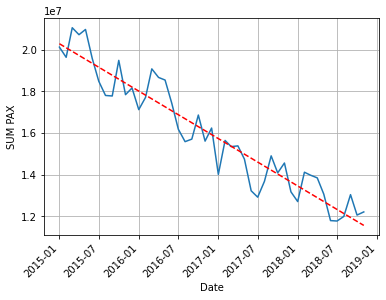

In [42]:
x_dates = df_ts.index
x_num = dates.date2num(x_dates)

# Calculate a fit line
trend = np.polyfit(x_num, df_ts.SUM_PAX, 1)
fit = np.poly1d(trend)

# General plot again
#figure(figsize=(12, 8))
plt.plot(x_dates, df_ts.SUM_PAX)
plt.xlabel('Date')
plt.ylabel('SUM PAX')
plt.grid()
plt.xticks(rotation=45, ha='right')

# Not really necessary to convert the values back into dates
#but added as a demonstration in case one wants to plot non-linear curves
x_fit = np.linspace(x_num.min(), x_num.max())
plt.plot(dates.num2date(x_fit), fit(x_fit), "r--")

# And show
plt.show()


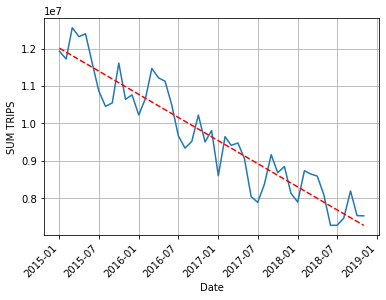

In [43]:
x_dates = df_ts.index
x_num = dates.date2num(x_dates)

# Calculate a fit line
trend = np.polyfit(x_num, df_ts.SUM_TRIPS, 1)
fit = np.poly1d(trend)

# General plot again
#figure(figsize=(12, 8))
plt.plot(x_dates, df_ts.SUM_TRIPS)
plt.xlabel('Date')
plt.ylabel('SUM TRIPS')
plt.grid()
plt.xticks(rotation=45, ha='right')

# Not really necessary to convert the values back into dates
#but added as a demonstration in case one wants to plot non-linear curves
x_fit = np.linspace(x_num.min(), x_num.max())
plt.plot(dates.num2date(x_fit), fit(x_fit), "r--")

# And show
plt.show()

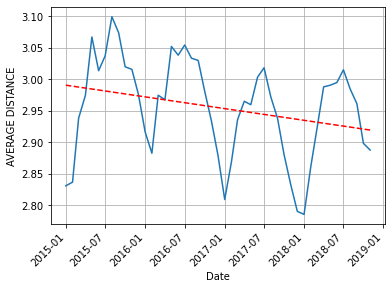

In [44]:
x_dates = df_ts.index
x_num = dates.date2num(x_dates)

# Calculate a fit line
trend = np.polyfit(x_num, df_ts.AVG_DIST, 1)
fit = np.poly1d(trend)

# General plot again
#figure(figsize=(12, 8))
plt.plot(x_dates, df_ts.AVG_DIST)
plt.xlabel('Date')
plt.ylabel('AVERAGE DISTANCE')
plt.grid()
plt.xticks(rotation=45, ha='right')

# Not really necessary to convert the values back into dates
#but added as a demonstration in case one wants to plot non-linear curves
x_fit = np.linspace(x_num.min(), x_num.max())
plt.plot(dates.num2date(x_fit), fit(x_fit), "r--")

# And show
plt.show()

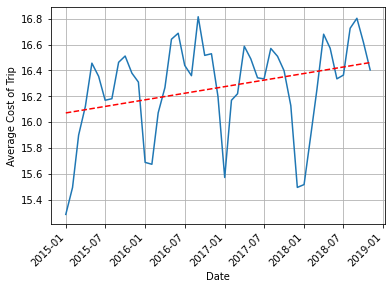

In [45]:
x_dates = df_ts.index
x_num = dates.date2num(x_dates)

# Calculate a fit line
trend = np.polyfit(x_num, df_ts.AVG_PAY, 1)
fit = np.poly1d(trend)

# General plot again
#figure(figsize=(12, 8))
plt.plot(x_dates, df_ts.AVG_PAY)
plt.xlabel('Date')
plt.ylabel('Average Cost of Trip')
plt.grid()
plt.xticks(rotation=45, ha='right')

# Not really necessary to convert the values back into dates
#but added as a demonstration in case one wants to plot non-linear curves
x_fit = np.linspace(x_num.min(), x_num.max())
plt.plot(dates.num2date(x_fit), fit(x_fit), "r--")

# And show
plt.show()

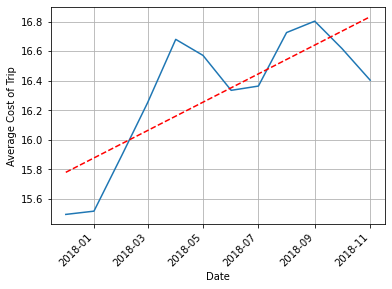

In [47]:
x_dates = df_ts.index[len(df_ts)-12:]
x_num = dates.date2num(x_dates)

# Calculate a fit line
trend = np.polyfit(x_num, df_ts.AVG_PAY[len(df_ts)-12:], 1)
fit = np.poly1d(trend)

# General plot again
#figure(figsize=(12, 8))
plt.plot(x_dates, df_ts.AVG_PAY[len(df_ts)-12:])
plt.xlabel('Date')
plt.ylabel('Average Cost of Trip')
plt.grid()
plt.xticks(rotation=45, ha='right')

# Not really necessary to convert the values back into dates
#but added as a demonstration in case one wants to plot non-linear curves
x_fit = np.linspace(x_num.min(), x_num.max())
plt.plot(dates.num2date(x_fit), fit(x_fit), "r--")

# And show
plt.show()

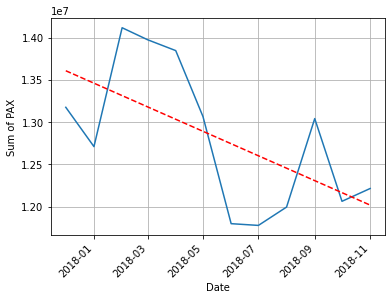

In [48]:
x_dates = df_ts.index[len(df_ts)-12:]
x_num = dates.date2num(x_dates)

# Calculate a fit line
trend = np.polyfit(x_num, df_ts.SUM_PAX[len(df_ts)-12:], 1)
fit = np.poly1d(trend)

# General plot again
#figure(figsize=(12, 8))
plt.plot(x_dates, df_ts.SUM_PAX[len(df_ts)-12:])
plt.xlabel('Date')
plt.ylabel('Sum of PAX')
plt.grid()
plt.xticks(rotation=45, ha='right')

# Not really necessary to convert the values back into dates
#but added as a demonstration in case one wants to plot non-linear curves
x_fit = np.linspace(x_num.min(), x_num.max())
plt.plot(dates.num2date(x_fit), fit(x_fit), "r--")

# And show
plt.show()

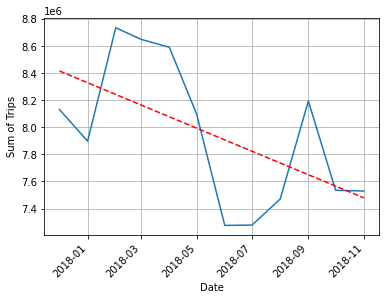

In [50]:
x_dates = df_ts.index[len(df_ts)-12:]
x_num = dates.date2num(x_dates)

# Calculate a fit line
trend = np.polyfit(x_num, df_ts.SUM_TRIPS[len(df_ts)-12:], 1)
fit = np.poly1d(trend)

# General plot again
#figure(figsize=(12, 8))
plt.plot(x_dates, df_ts.SUM_TRIPS[len(df_ts)-12:])
plt.xlabel('Date')
plt.ylabel('Sum of Trips')
plt.grid()
plt.xticks(rotation=45, ha='right')

# Not really necessary to convert the values back into dates
#but added as a demonstration in case one wants to plot non-linear curves
x_fit = np.linspace(x_num.min(), x_num.max())
plt.plot(dates.num2date(x_fit), fit(x_fit), "r--")

# And show
plt.show()

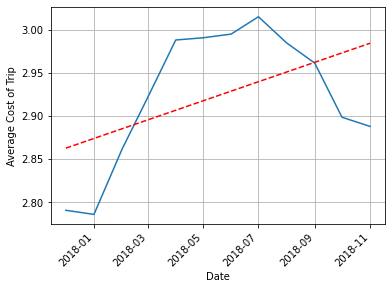

In [51]:
x_dates = df_ts.index[len(df_ts)-12:]
x_num = dates.date2num(x_dates)

# Calculate a fit line
trend = np.polyfit(x_num, df_ts.AVG_DIST[len(df_ts)-12:], 1)
fit = np.poly1d(trend)

# General plot again
#figure(figsize=(12, 8))
plt.plot(x_dates, df_ts.AVG_DIST[len(df_ts)-12:])
plt.xlabel('Date')
plt.ylabel('Average Cost of Trip')
plt.grid()
plt.xticks(rotation=45, ha='right')

# Not really necessary to convert the values back into dates
#but added as a demonstration in case one wants to plot non-linear curves
x_fit = np.linspace(x_num.min(), x_num.max())
plt.plot(dates.num2date(x_fit), fit(x_fit), "r--")

# And show
plt.show()

**Checkin for seasonality**

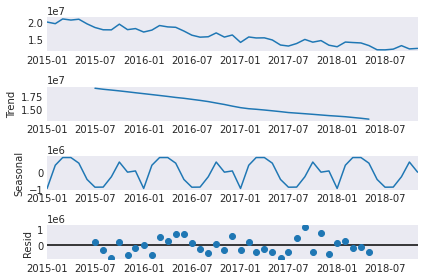

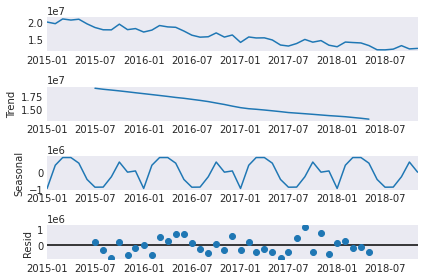

In [71]:
analysis = df_ts[['SUM_PAX']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="additive")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot()

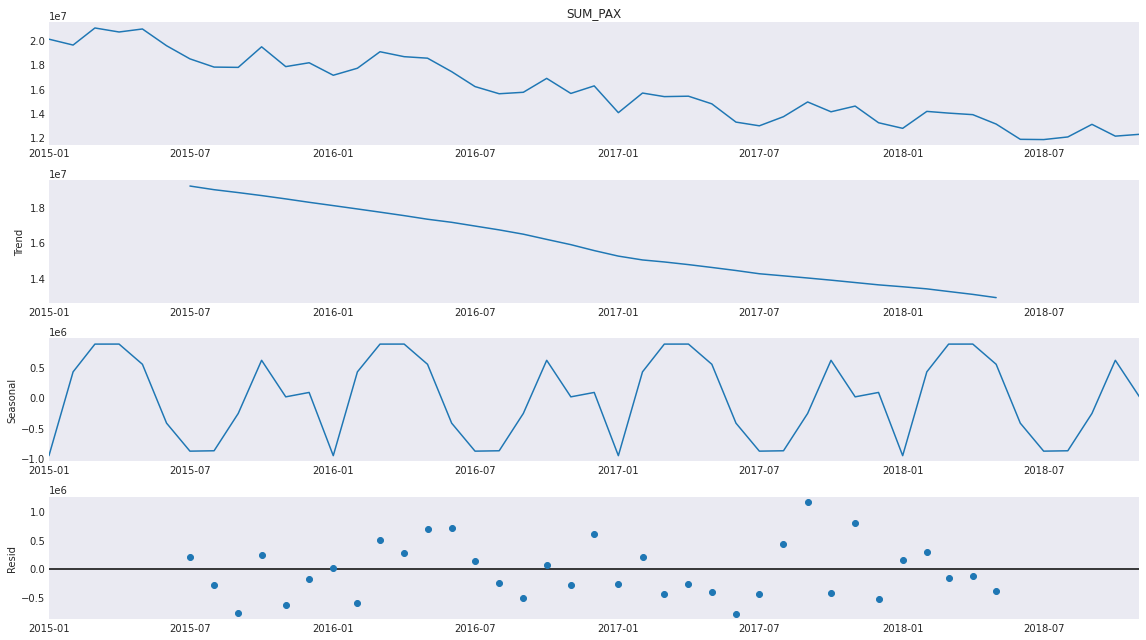

In [70]:
decomp_viz = sm.tsa.seasonal_decompose(df_ts.SUM_PAX)
fig = decomp_viz.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [60]:
df_ts

,SUM_PAX,SUM_TRIPS,AVG_DIST,AVG_PAY,AVG_PAX
MM_YYYY,,,,,
2015-01-01,20115194,11928948,2.831164,15.286883,1.686250
2015-02-01,19627197,11722300,2.837031,15.494843,1.674347
2015-03-01,21044981,12557468,2.938459,15.899538,1.675894
2015-04-01,20711510,12317618,2.974370,16.121819,1.681454
2015-05-01,20961872,12397823,3.067211,16.455888,1.690770
2015-06-01,19571546,11608771,3.013778,16.354221,1.685927
2015-07-01,18479757,10868995,3.037224,16.169183,1.700227
2015-08-01,17797560,10454727,3.099326,16.181166,1.702346
2015-09-01,17773222,10547949,3.074054,16.462607,1.684993


**Testing Hypothesis**

2) There are more trips in the evening.

In [159]:
# Let's check on how big the datasets are. 
# Every row is one trip. Let's remember that dataset has already been cleaned. 
# Information is valid for analysis.
print("Dimention of the datasets")
print("Whole FEB Dataset " + str(df_feb.shape)) 
print("FEB AM Dataset " + str(df_feb_AM.shape))
print("FEB PM Dataset " + str(df_feb_PM.shape))
print("Whole AGO Dataset " + str(df_ago.shape))
print("AGO AM Dataset " + str(df_ago_AM.shape))
print("AGO PM Dataset " + str(df_ago_PM.shape))

Dimention of the datasets
Whole FEB Dataset (8282121, 21)
FEB AM Dataset (4752041, 21)
FEB PM Dataset (3530080, 21)
Whole AGO Dataset (7426304, 21)
AGO AM Dataset (4205248, 21)
AGO PM Dataset (3221056, 21)


When defining AM = 06:00 - 18:00 and PM 18:00 - 06:00 we see that in both cases, either Winter (February) or Summer (August) there are more trips during the AM shift. 

However, the proportion of trips are different so we are going to analyze those.

In [160]:
# Trips in the evening are less in both winter and summer. Morning 6 AM to 6 PM, evening 6PM to 6 AM.

print(f"Proportion FEB AM Trips {4752421/8283036:.2%}")
print(f"Proportion FEB PM Trips {3530615/8283036*100:.2f}%")
print(f"Proportion AGO AM Trips {4312433/7616192*100:.2f}%")
print(f"Proportion AGO PM Trips {3303759/7616192*100:.2f}%")

Proportion FEB AM Trips 57.38%
Proportion FEB PM Trips 42.62%
Proportion AGO AM Trips 56.62%
Proportion AGO PM Trips 43.38%


Lets do a graph to see how's the behaviour of trips during the different hours. 

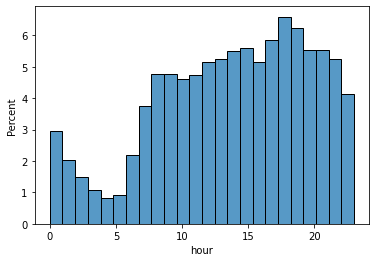

In [161]:
#February total 
fig, ax = plt.subplots()
sns.histplot(data=df_feb, x='hour', stat='percent', ax=ax, bins=24)
plt.show()

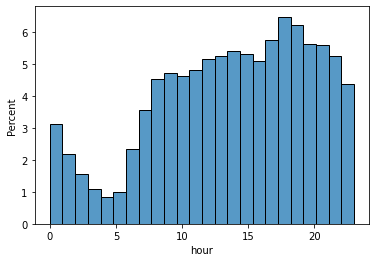

In [162]:
#August total 
fig, ax = plt.subplots()
sns.histplot(data=df_ago, x='hour', stat='percent', ax=ax, bins=24)
plt.show()

The behaviour seems to be quite the same. The absolute minimum for the day is at 4 AM and the maximum seems to be around 6 PM. However, let's see what data tells us when we separate the Weekend and Weekdays.

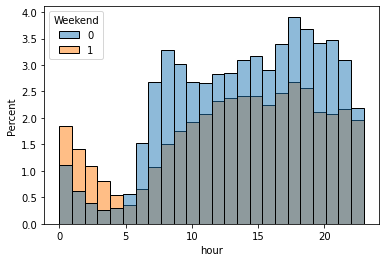

In [163]:
#February total with Weekend-Weekdays difference
fig, ax = plt.subplots()
sns.histplot(data=df_feb, x='hour', hue='Weekend', stat='percent', ax=ax, bins=24)
plt.show()

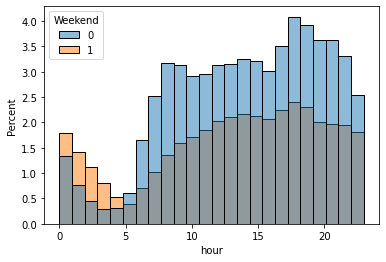

In [164]:
#August total with Weekend
fig, ax = plt.subplots()
sns.histplot(data=df_ago, x='hour', hue='Weekend', stat='percent', ax=ax, bins=24)
plt.show()

We clearly see that during the Week (Blue bars) the amount of taxi trips is higher on the "working hours" so 6 am to midnight. However, we see that during the weekends, the proportion of people that travel during the night (midnight to 4 AM) is higher than during the week.

**Testing Hypothesis**

3) People tip more during the weekend.


Tip is proportional to fare. Normally 10%-20% of total fare. Therefore, the longer the distance and time, the longer  we should expect the tip because total fare should be higher. Let's see.

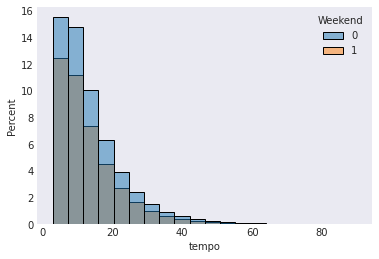

In [94]:
# Trip time in February
fig, ax = plt.subplots()
sns.histplot(data=df_feb, x='tempo', hue='Weekend', stat='percent', ax=ax, bins=20)
plt.show()

In [111]:
# TRIP TIME STATISTICS FEB
df_feb.tempo.groupby(by=df_feb.Weekend).describe()

,count,mean,std,min,25%,50%,75%,max
Weekend,,,,,,,,
0,4525009.0,13.847014,9.793894,3.016667,7.05,11.133333,17.566667,89.966667
1,3373150.0,13.236576,9.278050,3.016667,6.75,10.666667,16.833333,89.983333


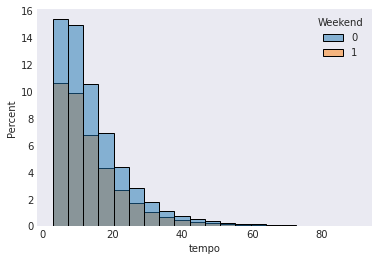

In [95]:
# Trip time in August
fig, ax = plt.subplots()
sns.histplot(data=df_ago, x='tempo', hue='Weekend', stat='percent', ax=ax, bins=20)
plt.show()

In [112]:
# TRIP TIME STATISTICS AGO
df_ago.tempo.groupby(by=df_ago.Weekend).describe()

,count,mean,std,min,25%,50%,75%,max
Weekend,,,,,,,,
0,4101575.0,14.701093,10.674849,3.016667,7.300000,11.700000,18.666667,89.983333
1,2663282.0,14.164365,10.231069,3.016667,7.066667,11.266667,17.983333,89.983333


Trips in august seem to consume just a tiny bit more time than in February.

Let's analize the distance of the trips.

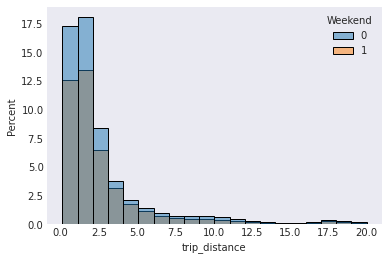

In [113]:
# Trip Distance in february
fig, ax = plt.subplots()
sns.histplot(data=df_feb, x='trip_distance', hue='Weekend', stat='percent', ax=ax, bins=20)
plt.show()

In [115]:
# Distance statistics february
df_feb.trip_distance.groupby(by=df_feb.Weekend).describe()


,count,mean,std,min,25%,50%,75%,max
Weekend,,,,,,,,
0,4525009.0,2.808748,3.287802,0.11,1.00,1.62,2.93,19.99
1,3373150.0,2.755167,3.155904,0.11,1.01,1.68,3.00,19.99


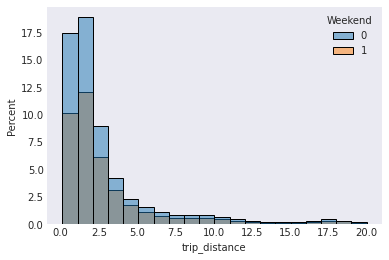

In [97]:
# Trip Distance in August
fig, ax = plt.subplots()
sns.histplot(data=df_ago, x='trip_distance', hue='Weekend', stat='percent', ax=ax, bins=20)
plt.show()

In [116]:
# Statistics trip distance in AUGUST
df_ago.trip_distance.groupby(by=df_ago.Weekend).describe()

,count,mean,std,min,25%,50%,75%,max
Weekend,,,,,,,,
0,4101575.0,2.947429,3.463337,0.11,1.03,1.7,3.10,19.99
1,2663282.0,3.119562,3.572400,0.11,1.10,1.8,3.39,19.99


Values for quartiles seem to be a little higher for August too. Therefore, the tip value should be a little higher in August. 

In [117]:
# Statistics on Tips on Weekend and Weekdays - FEBRUARY - WINTER
df_feb.tip_amount.groupby(by=df_feb.Weekend).describe()

,count,mean,std,min,25%,50%,75%,max
Weekend,,,,,,,,
0,4525009.0,1.91987,2.315404,0.0,0.0,1.55,2.49,441.11
1,3373150.0,1.73730,2.186703,0.0,0.0,1.45,2.32,366.00


In [118]:
# Statistics on Tips on Weekend and Weekdays - AUGUST - SUMMER

df_ago.tip_amount.groupby(by=df_ago.Weekend).describe()

,count,mean,std,min,25%,50%,75%,max
Weekend,,,,,,,,
0,4101575.0,1.875338,2.368028,0.0,0.0,1.50,2.46,322.27
1,2663282.0,1.748142,2.413226,0.0,0.0,1.35,2.35,333.23


AVG tip seem to be higher in February even though the trips are a little longer in time and distance in August. 

People appreciate and tip more their time in Winter and they tip more? Don't wanna be wet? Don't wanna get sick?

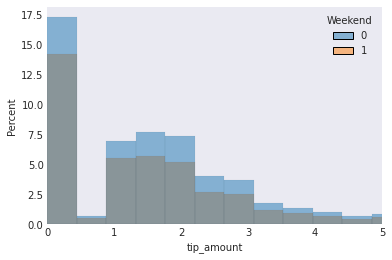

In [119]:
# Histogram of how people Tip in FEBRUARY
fig, ax = plt.subplots()
sns.histplot(data=df_feb, x='tip_amount', hue='Weekend', stat='percent',ax=ax, bins=1000)
ax.set_xlim(0, 5)
plt.show()

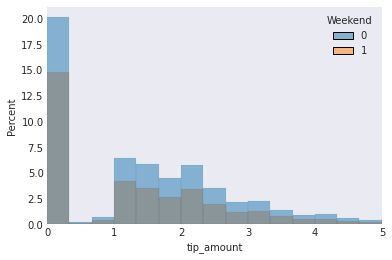

In [120]:
# Histogram of how people Tip in AUGUST
fig, ax = plt.subplots()
sns.histplot(data=df_ago, x='tip_amount', hue='Weekend', stat='percent',ax=ax, bins=1000)
ax.set_xlim(0, 5)
plt.show()

First glance. In both Winter and summer we have a mean tip of less than $2. When we know that the tip for taxi drivers is about the same as for any service in the US. in order to see if hour data is accurate we should have a mean taxi fare between 20-30 dollars.

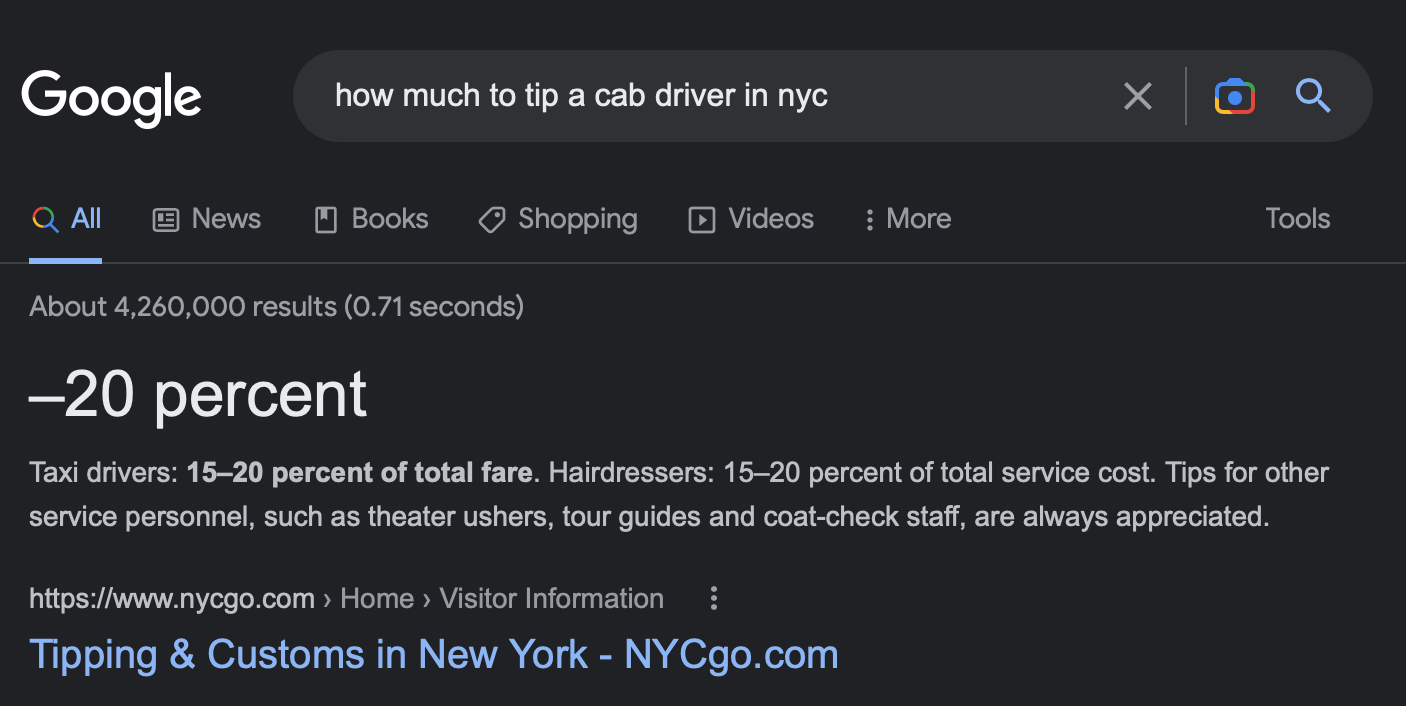

In [106]:

print("We use median to avoid that that the outliers affect our analysis")
print("Estimated tip FEB according to 20% of the median value of the fare: " + str(df_feb.fare_amount.median()*0.2))
print("Observed mean tip in FEB " + str(df_feb.tip_amount.mean()))
print("Estimated tip AGO according to 20% of the median value of the fare: " + str(df_ago.fare_amount.median()*0.2))
print("Observed mean tip in AGO " + str(df_feb.tip_amount.mean()))

We use median to avoid that that the outliers affect our analysis
Estimated tip FEB according to 20% of the median value of the fare: 1.8
Observed mean tip in FEB 1.841897796689078
Estimated tip AGO according to 20% of the median value of the fare: 1.9000000000000001
Observed mean tip in AGO 1.841897796689078


**PEOPLE DON'T TIP MORE ON THE WEKENDS**

**Testing Hypothesis**
4) People take longer duration trips on the weekends.

In [123]:
# We will use information that we already used. 

# Distance statistics february
df_feb.trip_distance.groupby(by=df_feb.Weekend).describe()

,count,mean,std,min,25%,50%,75%,max
Weekend,,,,,,,,
0,4525009.0,2.808748,3.287802,0.11,1.00,1.62,2.93,19.99
1,3373150.0,2.755167,3.155904,0.11,1.01,1.68,3.00,19.99


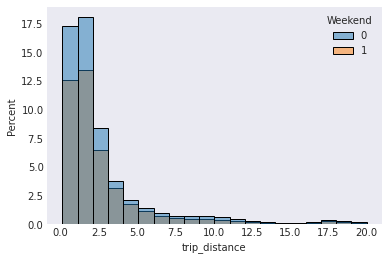

In [125]:
# Trip Distance in february
fig, ax = plt.subplots()
sns.histplot(data=df_feb, x='trip_distance', hue='Weekend', stat='percent', ax=ax, bins=20)
plt.show()

In [124]:
# Statistics trip distance in AUGUST
df_ago.trip_distance.groupby(by=df_ago.Weekend).describe()

,count,mean,std,min,25%,50%,75%,max
Weekend,,,,,,,,
0,4101575.0,2.947429,3.463337,0.11,1.03,1.7,3.10,19.99
1,2663282.0,3.119562,3.572400,0.11,1.10,1.8,3.39,19.99


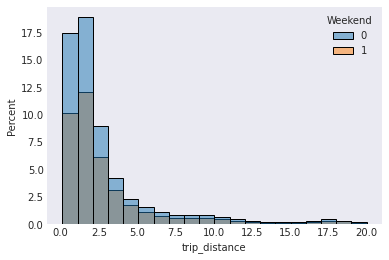

In [126]:
# Trip Distance in August
fig, ax = plt.subplots()
sns.histplot(data=df_ago, x='trip_distance', hue='Weekend', stat='percent', ax=ax, bins=20)
plt.show()

People travel longer in the weekends in SUMMER. In winter they travel less distance. Meaning, in SUMMER they go out more and enjoy time outside, do day trips, etc. In WINTER they rather stay home, therefore, trips are in average shorter in weekends. When they have free time in WINTER they stay home, in summer they go out. 